# Non-linear Regression

If the data shows a curved trend, then the linear regression will not produce the exact same results as the non-linear regression because, as the name implies, the linear regression assumes that the data is linear.
Let's learn about nonlinear regression and apply an example in python. In this notebook, we fit the non-linear model to the data points corresponding to China's GDP from 1960-2014.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Although linear regression is great for solving many problems, it cannot be used for every data set. First recall how linear regression can model a data set. It models a linear relationship between the dependent variable y and the independent variable x. It has a simple quadratic equation, for example: y = $2x$ + 3.

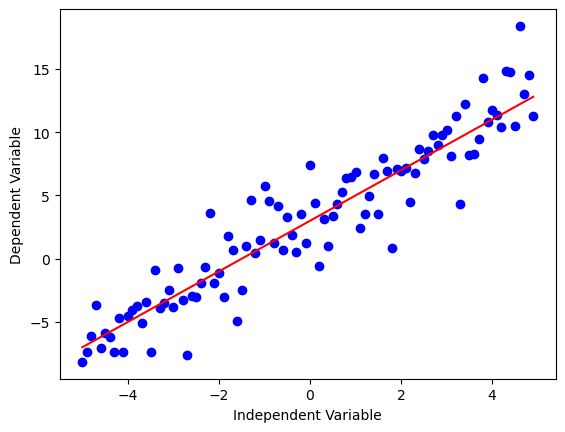

In [3]:
x = np.arange(-5.0, 5.0, 0.1)

# Bạn có thể điều chỉnh độ dốc và hệ số chặn để xác minh những thay đổi trong biểu đồ
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Nonlinear regression is the relationship between the independent variables $x$ and the dependent variable $y$ resulting in nonlinear functional modeling data. Basically, any relationship that is not linear can be called non-linear and is usually represented by a polynomial $k$ of degree (Maximum power of $x$).

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements such as exponents, logarithms, fractions,... For example: $$ y = \log(x)$$

Or even more complex such as:
$$ y = \log(a x^3 + b x^2 + c x + d)$$

Let's look at the graph of a cubic function.

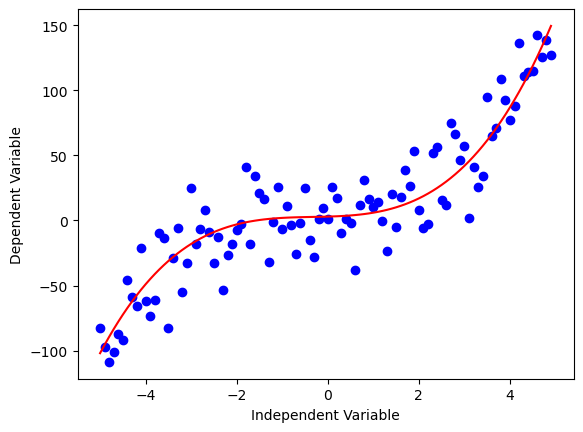

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x,y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

As you can see, this function has independent variables $x^3$ and $x^2$. Also, the graph of this function is not a straight line in the 2D plane. So this is a non-linear function.

$$ Y = X^2 $$


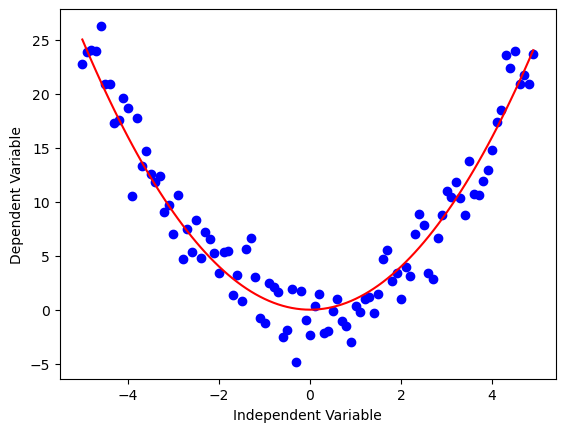

In [5]:
x = np.arange(-5.0, 5.0, 0.1)

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

An exponential function with base c is defined in terms of $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base c is a constant and the exponent x is a variable.

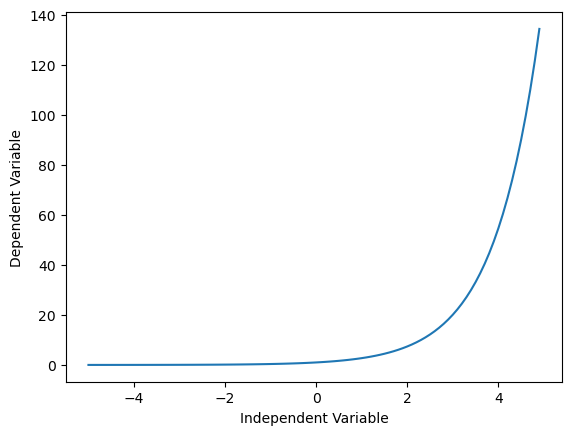

In [6]:
X = np.arange(-5.0, 5.0, 0.1)

Y= np.exp(X)
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Logarithms

$y$ is the result of applying a logarithmic mapping from input $ x $ to the output variable $y$. This is one of the simplest forms of **log()**: i.e. $$ y = \log(x)$$

Remember that instead of $x$, $X$ can be used, which can be a polynomial representation of $x$. In the general form, it would be written as
\begin{equation}
y = \log(X)
\end{equation}

C:\Users\Dell\AppData\Local\Temp\ipykernel_18700\3471947836.py:2: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


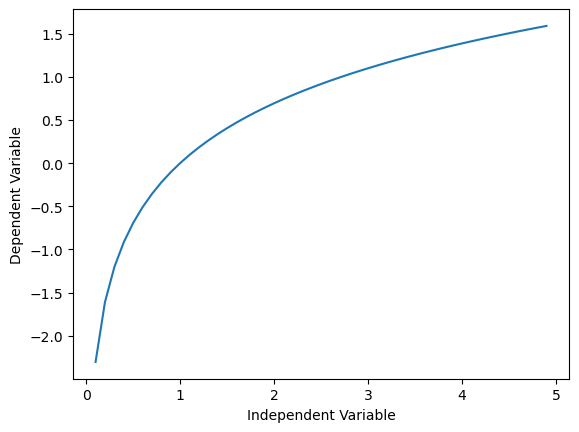

In [7]:
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Hàm Sigmoidal/Logistic


$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$


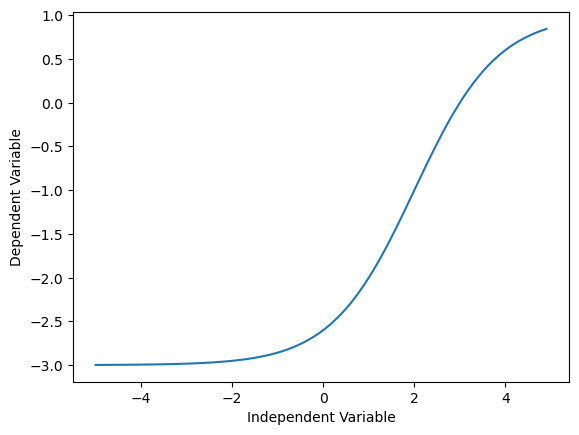

In [8]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

For example, we will try to fit a non-linear model with the data point corresponding to China's GDP from 1960 to 2014. Download the dataset with 2 columns, the first column is the year from 1960 to 2014, the second column is China's respective Annual Gross Domestic Product in US dollars for that year.

In [9]:
import numpy as np
import pandas as pd
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Graph the data set

The data points will look like this. It is like a logistic or exponential function. Growth started slowly, then from 2005 onward, it grew significantly. And finally, it slowed down a bit in the 2010s.

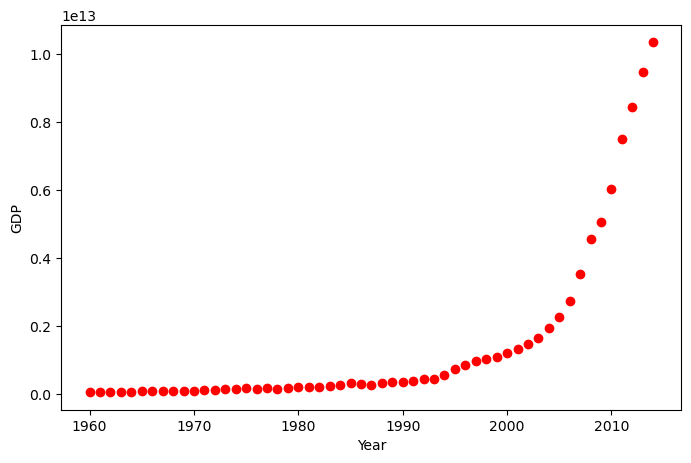

In [10]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### Choose a model

Looking through the graph, we determine that the logistic function can be a good asymptote,
because it has the property of starting slowly, increasing in the middle and then decreasing again at the end, as illustrated below:

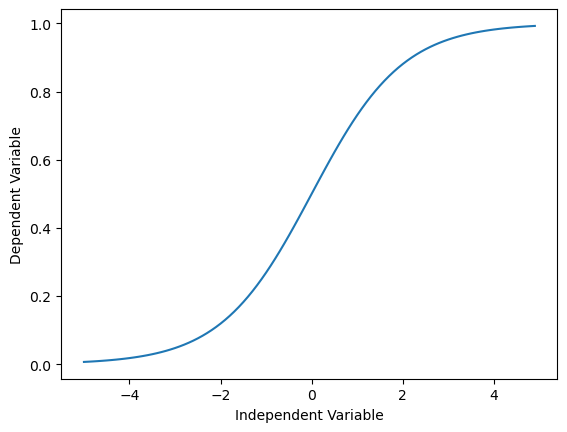

In [11]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

The formula for the logistic function is as follows:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Control the slope of the curve,

$\beta_2$: Slide the curve on the x-axis.

### Model creation

Now, let's build the regression model and initialize its parameters.

In [17]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

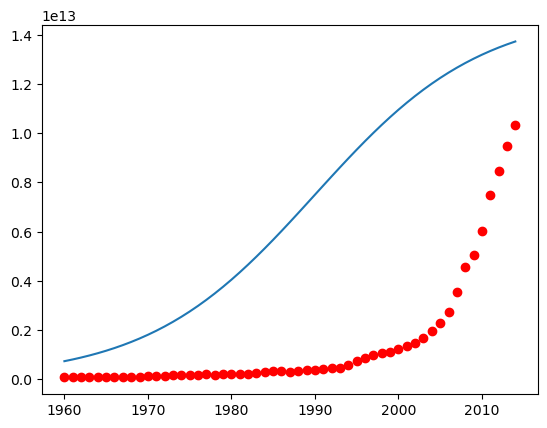

In [18]:
beta_1 = 0.10
beta_2 = 1990.0

# Logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

# data visualization
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [19]:
# normalize data
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

#### How do we find the best parameters for the fit line?

We can use **curve_fit** using non-linear least squares to fit the sigmoid function to the data. Optimal values for parameters so that sum of squares of residuals of sigmoid (xdata,* popt) - ydata is minimized.

popt are optimized parameters.

In [20]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


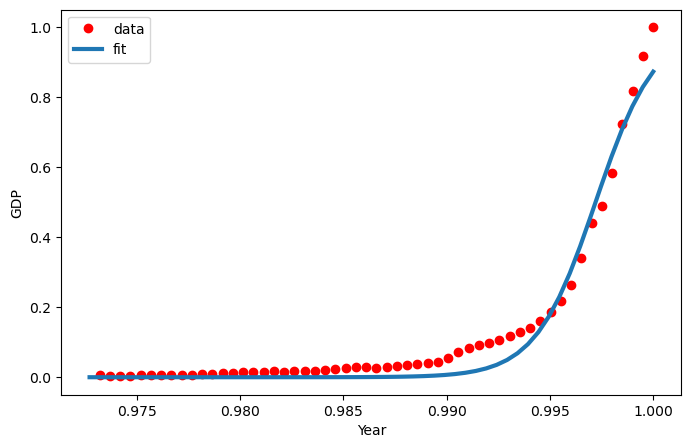

In [21]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [22]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

C:\Users\Dell\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Mean absolute error: 0.24
Residual sum of squares (MSE): 0.15
R2-score: -23765006638216422889558071253663744.00
